## Retreiving the Results of Jobs at a Later Date ##

As a user, it may be useful to submit a job to Resonance, and to retrieve the results at a later date. This is especially true if you want to prepare and submit your cirucits ahead of time, so as to maximise quantum computation time. In this notebook we briefly outline how to accomplish this, using as an example the problem from https://resonance.meetiqm.com/docs of creating a GHZ state.

# Submitting job #

This part of the code functions identically to our previous example: we set up our backend using the relevant server_url and api_token, and submit our transpiled circuit to be run.

In [1]:
from iqm.qiskit_iqm import IQMProvider, transpile_to_IQM,IQMJob
from qiskit import QuantumCircuit
from qiskit import visualization


server_url = "https://cocos.resonance.meetiqm.com/garnet"  # For example https://cocos.resonance.meetiqm.com/garnet
api_token = "287K1FQqLZ9JU+FxO6C4l6TXENKy0SFUO8h5P4po3DIGZeGb5qhzo4AAi21PIAqd"

SHOTS = 20000

# Define quantum circuit
num_qb = 5
qc = QuantumCircuit(num_qb)

qc.h(0)
for qb in range(1, num_qb):
    qc.cx(0, qb)
qc.barrier()
qc.measure_all()

# Initialize backend
backend = IQMProvider(server_url, token=api_token).get_backend()

# Transpile circuit
qc_transpiled = transpile_to_IQM(qc, backend)
print(qc_transpiled.draw(output="text"))

# Run circuit
#job_submit = backend.run([qc_transpiled]*500, shots=SHOTS)




global phase: 3π/2
                                                                       »
   q_0: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_1: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_2: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_3: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_4: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_5: ───────────────────────────────────────────────────────────────»
                                                                       »
   q_6: ────────────────────────

Your job has now been successfully submitted to Resonance, and should appear under your "latest jobs" tab on the resonance dashboard. In order to access the results of this job once it has finished running, we will need it's unique job_id; this can be found using the following command:

In [2]:
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
from src.executor import Resonance_batched_executor

executor=Resonance_batched_executor(backend,max_circuit=500,max_batch=1000000,max_concurrent=5)

#We expect this job to fail....
executor.run('Testing_Repairs',[qc_transpiled]*1000,shots=1000)

Dealing with 1000 circuits, 2.000e+04 instructions, and 1.000e+06 total shots.
Created 2 batches!
Optimistic and approximate runtime: 1018.0 seconds
beginning first submission!


In [ ]:
executor.repair('Testing_Repairs',[qc_transpiled]*1000,shots=1000)

In [16]:
submitted_job_id=job_submit.job_id()
print(submitted_job_id)

06679768-020d-726b-8000-3d38391de47f


Alternatively, you can click on the job under "latest jobs" to obtain the job_id - it is the hexidecimal string immediately after "Job" displayed as the title.

# Retrieve Job #

Once the job's status is marked as "Completed" in the dashboard, the results are ready to be downloaded. To do this, we define a new job with the same unique id as that which we submitted to the server. This can done via the code below, and works even if the kernel has been restarted since the job's submission:

In [17]:
retrieved_job = IQMJob(backend,submitted_job_id)

Our newly define job will contain all the results and metadata from the job submitted and evaluated; for example, we can plot the counts we obtained. Here are sample results for the circuit defined above:

In [7]:
Job_List=['0667b597-6a09-745c-8000-620ece64d26e','0667aae9-779a-7935-8000-921ccd01b969','0667b2e8-c4c2-7f1c-8000-ec901226791b','0667b2e8-93b0-7515-8000-f882f3d5fd58','0667b2e8-5a8a-7d40-8000-301489acc942','0667ae68-11bf-76b2-8000-7b87ee61e6fc']
ntjobs=len(Job_List)
for i in range(6):
    c_id=Job_List[i]
    IQMJob(backend,c_id).status()

In [18]:
result_dict = retrieved_job.result().get_counts()
#visualization.plot_histogram(result_dict)

CircuitExecutionError: Execution failed:   + Exception Group Traceback (most recent call last):
  |   File "/opt/app/.local/lib/python3.11/site-packages/celery/app/trace.py", line 477, in trace_task
  |     R = retval = fun(*args, **kwargs)
  |                  ^^^^^^^^^^^^^^^^^^^^
  |   File "/opt/app/.local/lib/python3.11/site-packages/celery/app/trace.py", line 760, in __protected_call__
  |     return self.run(*args, **kwargs)
  |            ^^^^^^^^^^^^^^^^^^^^^^^^^
  |   File "/opt/app/src/iqm/station_control/task_queue/tasks.py", line 194, in sweep_task
  |     was_interrupted = self.station_control.execute_sweep(
  |                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  |   File "/opt/app/src/iqm/station_control/monolith/station_control.py", line 394, in execute_sweep
  |     was_interrupted = self.station_engine.execute_sweep(
  |                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  |   File "/usr/local/lib/python3.11/contextlib.py", line 81, in inner
  |     return func(*args, **kwds)
  |            ^^^^^^^^^^^^^^^^^^^
  |   File "/opt/app/src/iqm/station_control/engine/station_engine.py", line 215, in execute_sweep
  |     execution_handler.execute(program_fragments, result_pipeline)
  |   File "/opt/app/src/iqm/station_control/engine/execution_handler.py", line 322, in execute
  |     run_in_new_asyncio_loop(async_execute_main)
  |   File "/opt/app/src/iqm/station_control/engine/async_execution.py", line 652, in run_in_new_asyncio_loop
  |     anyio.run(_main_coro, task, backend="asyncio", backend_options=_asyncexec_params.ANYIO_BACKEND_OPTIONS)
  |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_core/_eventloop.py", line 73, in run
  |     return async_backend.run(func, args, {}, backend_options)
  |            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 2001, in run
  |     return runner.run(wrapper())
  |            ^^^^^^^^^^^^^^^^^^^^^
  |   File "/usr/local/lib/python3.11/asyncio/runners.py", line 118, in run
  |     return self._loop.run_until_complete(task)
  |            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  |   File "/usr/local/lib/python3.11/asyncio/base_events.py", line 653, in run_until_complete
  |     return future.result()
  |            ^^^^^^^^^^^^^^^
  |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 1989, in wrapper
  |     return await func(*args)
  |            ^^^^^^^^^^^^^^^^^
  |   File "/opt/app/src/iqm/station_control/engine/async_execution.py", line 648, in _main_coro
  |     async with anyio.create_task_group() as main_tasks:
  |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 678, in __aexit__
  |     raise BaseExceptionGroup(
  | ExceptionGroup: unhandled errors in a TaskGroup (1 sub-exception)
  +-+---------------- 1 ----------------
    | Traceback (most recent call last):
    |   File "/opt/app/src/iqm/station_control/engine/execution_handler.py", line 316, in async_execute_main
    |     await chunk_execs[-1].state.is_done.done.wait()
    |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 1651, in wait
    |     await self._event.wait()
    |   File "/usr/local/lib/python3.11/asyncio/locks.py", line 213, in wait
    |     await fut
    | asyncio.exceptions.CancelledError: Cancelled by cancel scope 7f9f98cb5d90
    | 
    | During handling of the above exception, another exception occurred:
    | 
    | Exception Group Traceback (most recent call last):
    |   File "/opt/app/src/iqm/station_control/engine/util/otel_instrumentation.py", line 126, in _wrapped_coro_fun
    |     return await fun(*args, **kwargs)
    |            ^^^^^^^^^^^^^^^^^^^^^^^^^^
    |   File "/opt/app/src/iqm/station_control/engine/execution_handler.py", line 282, in async_execute_main
    |     async with anyio.create_task_group() as background_tasks:
    |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 678, in __aexit__
    |     raise BaseExceptionGroup(
    | ExceptionGroup: unhandled errors in a TaskGroup (1 sub-exception)
    +-+---------------- 1 ----------------
      | Exception Group Traceback (most recent call last):
      |   File "/opt/app/src/iqm/station_control/engine/util/otel_instrumentation.py", line 126, in _wrapped_coro_fun
      |     return await fun(*args, **kwargs)
      |            ^^^^^^^^^^^^^^^^^^^^^^^^^^
      |   File "/opt/app/src/iqm/station_control/engine/async_io.py", line 185, in poll_background_task
      |     async with anyio.create_task_group() as tg:
      |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 678, in __aexit__
      |     raise BaseExceptionGroup(
      | ExceptionGroup: unhandled errors in a TaskGroup (1 sub-exception)
      +-+---------------- 1 ----------------
        | Traceback (most recent call last):
        |   File "/opt/app/src/iqm/station_control/engine/executors/iqm/olympos_streaming_io.py", line 275, in _polling_loop_task
        |     events = await anyio.to_thread.run_sync(orch.poll_stream_playback_events)
        |              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/to_thread.py", line 56, in run_sync
        |     return await get_async_backend().run_sync_in_worker_thread(
        |            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 2144, in run_sync_in_worker_thread
        |     return await future
        |            ^^^^^^^^^^^^
        |   File "/opt/app/.local/lib/python3.11/site-packages/anyio/_backends/_asyncio.py", line 851, in run
        |     result = context.run(func, *args)
        |              ^^^^^^^^^^^^^^^^^^^^^^^^
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/orchestrator.py", line 929, in poll_stream_playback_events
        |     self._stream_playback_handle_responses(responses)
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/orchestrator.py", line 533, in _stream_playback_handle_responses
        |     self._stream_playback_resp_handler(resp)
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/orchestrator.py", line 493, in _stream_playback_handle_resp_state_new_msg
        |     self.stream_playback_end()
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/orchestrator.py", line 612, in stream_playback_end
        |     self._raise_stream_error(self._stream_error_resp)
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/orchestrator.py", line 396, in _raise_stream_error
        |     self._client.verify_cmd_succeeded(jerr) # Should always raise
        |     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        |   File "/opt/app/.local/lib/python3.11/site-packages/rfctrl/client.py", line 398, in verify_cmd_succeeded
        |     raise CommandError(err_msg)
        | rfctrl.exceptions.CommandError: Operation timed out: Program playback time exceeded
        +------------------------------------


In [8]:
len(result_dict)

2

In [11]:
[sum(result_dict[0].values()),sum(result_dict[1].values())]

[19999, 19999]

In [24]:
len(qc_transpiled._data)*500

10000

In [27]:
from qiskit import QuantumCircuit, transpile
# from qiskit.providers.aer import QasmSimulator
# from qiskit.providers.basicaer import QasmSimulatorPy
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManila, FakeToronto, FakeJakartaV2, FakeProvider
from qiskit.circuit import Parameter
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.synthesis import QDrift, LieTrotter, SuzukiTrotter

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.preprocessing as skp
from scipy.signal import savgol_filter
import os
import sys
from datetime import date
import pathlib
import inspect
import time
import glob

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('..')) # qrc_surrogate
sys.path.append(module_path)
fig_path = f'{module_path}/figs'

from qiskit import qpy
from src.feedforward import QExtremeLearningMachine, CPolynomialFeedforward
from src.rewinding import QRewindingRC, QRewindingStatevectorRC,QRewindingRC_Async,QRewindingRC_Custom
from src.data import DataSource

from iqm.qiskit_iqm import IQMFakeAdonis
from iqm.qiskit_iqm import IQMProvider,transpile_to_IQM

server_url = "https://cocos.resonance.meetiqm.com/garnet"  # For example https://cocos.resonance.meetiqm.com/garnet
api_token = "287K1FQqLZ9JU+FxO6C4l6TXENKy0SFUO8h5P4po3DIGZeGb5qhzo4AAi21PIAqd"

SHOTS = 8000

backend = IQMProvider(server_url, token=api_token).get_backend()

In [28]:
with open('Real_Garnet_Manual_train'+'_circuits/saved_circuits','rb') as saved_circ:
    qc_list=qpy.load(saved_circ)
    print('circuits loaded')

circuits loaded


In [29]:
from src.executor import Resonance_batched_executor

In [30]:
250000*1024/8192

31250.0

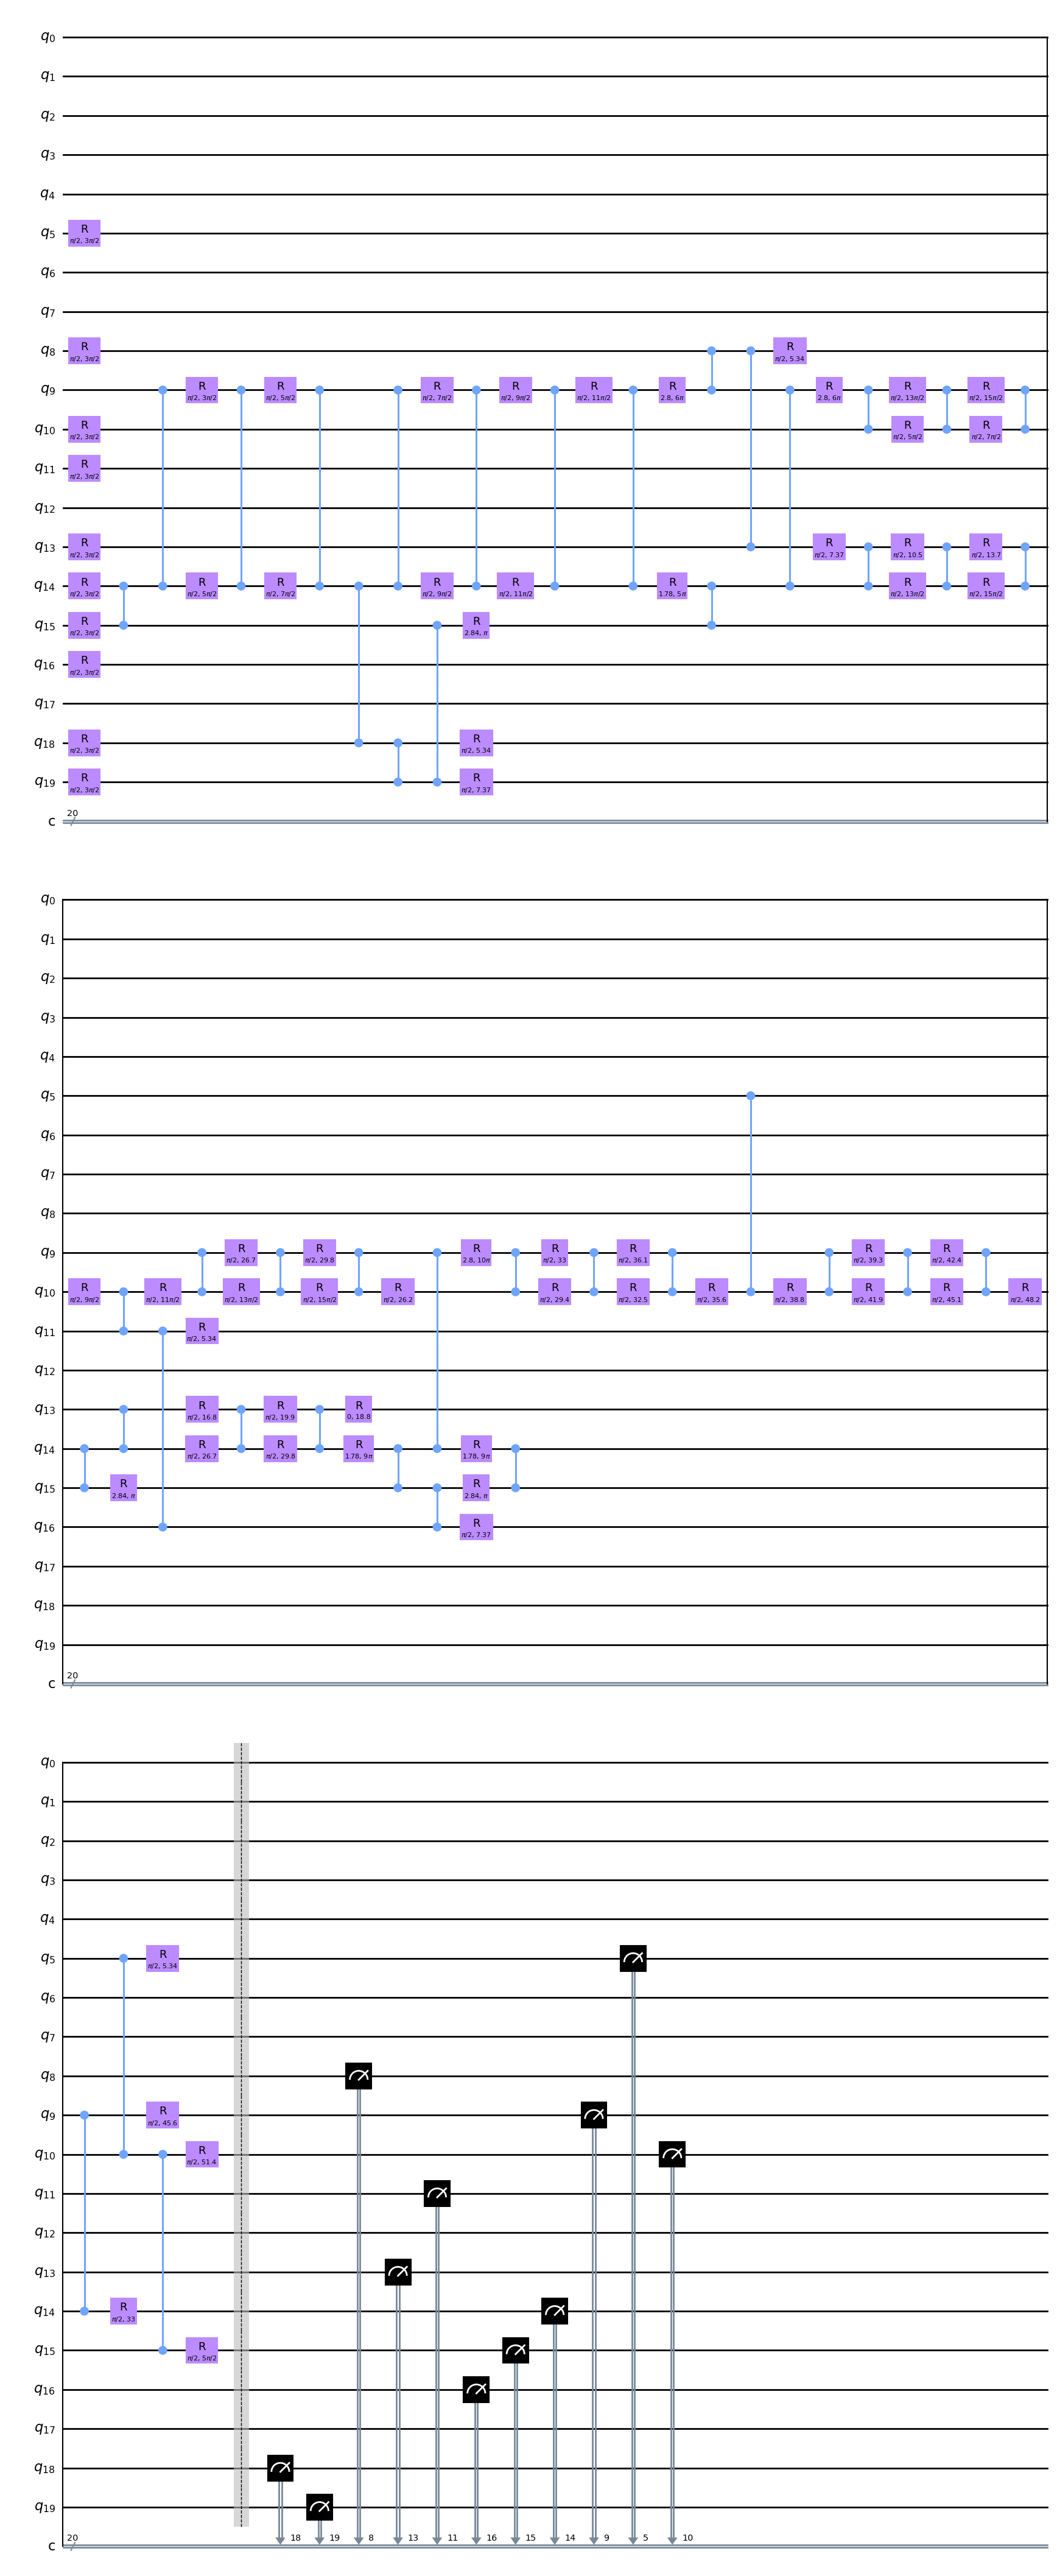

In [38]:
qc_list[0].draw('mpl')

In [40]:
executor=Resonance_batched_executor(backend,max_circuit=1000,max_batch=31250,max_concurrent=5)

executor.run('Optimistic_run',qc_list,shots=8192)

Dealing with 23880 circuits, 3.622e+06 instructions, and 1.956e+08 total shots.
Created 117 batches!
Optimistic and approximate runtime: 196677.96 seconds
beginning first submission!
maximum waiting jobs has been met. Please wait and try again.


In [43]:
obtained=IQMJob(backend,'0667a9f8-ae1d-72f8-8000-e084199491ab').result().get_counts()

In [44]:
len(obtained)
sum(list(obtained[0].values()))

8192

In [47]:
IQMJob(backend,'0667abb6-3ede-7191-8000-8c745c1c7265').result().get_counts()

CircuitExecutionError: Job deleted

In [49]:
if 1 in [1,2,3] and 4 not in [1,2,3]:
    print('Verifty')

Verifty


In [56]:
[1,2,3,4,5][2:np.floor(5)]

TypeError: slice indices must be integers or None or have an __index__ method

In [62]:
executor=Resonance_batched_executor(backend,max_circuit=1000,max_batch=31250,max_concurrent=5)

executor.run('Optimistic_run',qc_list,shots=8192)

In [68]:
test=[0,1,2,3]
test.insert(5,10)
test

[0, 1, 2, 3, 10]